<a href="https://colab.research.google.com/github/dendiaryar/Rock-Paper-Scissors/blob/main/Submission1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-22 08:14:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1005KB/s    in 5m 26s  

2021-05-22 08:20:01 (967 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/'


In [14]:
pip install split-folders

In [16]:
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 4694.12 files/s]


In [17]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [18]:
augs_gen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)  


In [19]:
train_generator = augs_gen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')
 
validation_generator = augs_gen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [20]:
model = tf.keras.models.Sequential(
    [
    tf.keras.layers.Conv2D(64, (3,3), strides=(1), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ]
)

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),  
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
mc = ModelCheckpoint( #monitor val_loss, save best model setiap 8 epoch apabila ada improvement dari model sebelumnya
    filepath='model.yeah.hdf5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=8
)
es = EarlyStopping( #menghentikan training apabila val_loss tidak mengalami improvement dengan minimum perubahan 0.1
    monitor='val_loss',
    min_delta=0.01,
    patience=8,
    verbose=1,
    mode='min'
)
re = ReduceLROnPlateau( #mengurangi learning rate apabila val_loss tidak mengalami improvement
    monitor='val_loss',
    factor=0.5,
    patience=4,
    verbose=1, 
    mode='min',
    cooldown=1 
)
my_callbacks = [es,mc,re]

In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=54,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=16,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=439/32,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks=my_callbacks,
      verbose=1,
      )

Epoch 1/16
54/54 [==============================] - 47s 262ms/step - loss: 1.1030 - accuracy: 0.3923 - val_loss: 0.6642 - val_accuracy: 0.7654
Epoch 2/16
54/54 [==============================] - 13s 241ms/step - loss: 0.5058 - accuracy: 0.8146 - val_loss: 0.2898 - val_accuracy: 0.8861
Epoch 3/16
54/54 [==============================] - 13s 241ms/step - loss: 0.3081 - accuracy: 0.9034 - val_loss: 0.2427 - val_accuracy: 0.9203
Epoch 4/16
54/54 [==============================] - 13s 244ms/step - loss: 0.2526 - accuracy: 0.9227 - val_loss: 0.2124 - val_accuracy: 0.9294
Epoch 5/16
54/54 [==============================] - 13s 241ms/step - loss: 0.2194 - accuracy: 0.9269 - val_loss: 0.2429 - val_accuracy: 0.9294
Epoch 6/16
54/54 [==============================] - 13s 243ms/step - loss: 0.1912 - accuracy: 0.9340 - val_loss: 0.1875 - val_accuracy: 0.9408
Epoch 7/16
54/54 [==============================] - 13s 241ms/step - loss: 0.1345 - accuracy: 0.9604 - val_loss: 0.2155 - val_accuracy: 0.9294

In [24]:
model.load_weights('model.yeah.hdf5')
scores = model.evaluate(validation_generator)
print("Model Test Loss:",scores[0])
print("Model Test Accuracy:",scores[1])

14/14 [==============================] - 3s 181ms/step - loss: 0.1595 - accuracy: 0.9590
Model Test Loss: 0.15948696434497833
Model Test Accuracy: 0.9589977264404297


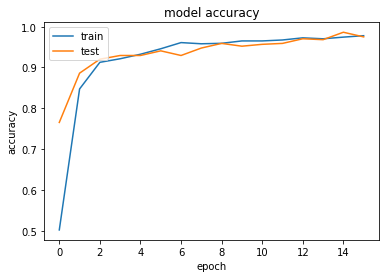

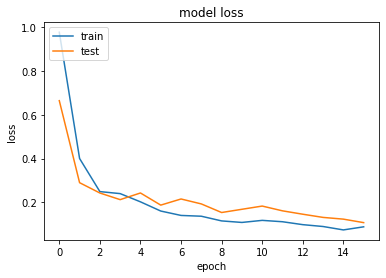

In [25]:
import matplotlib.pyplot as plt
import numpy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 20568308-rock-paper-scissors-paper-hand-isolated-on-white.jpg to 20568308-rock-paper-scissors-paper-hand-isolated-on-white.jpg
20568308-rock-paper-scissors-paper-hand-isolated-on-white.jpg
[[1. 0. 0.]]
paper


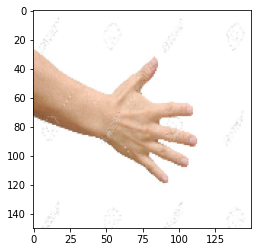

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)
  if(classes[0][0] == 1):
    print('paper')
  if(classes[0][1] == 1):
    print('rock')
  if(classes[0][2] == 1):
    print('scissor')